In [35]:
import pandas as pd
import seaborn as sns
models_df = pd.read_csv("eval_df.csv", index_col=0)
models_df.head()
models_df['model_name'].unique()

extension = pd.read_csv("ext.csv")


models_df = models_df[models_df["model_name"] != "MultilayerTransformerBlockModel"]

# extension = extension.groupby(["epoch", "ModelName"]).mean().reset_index()
# extension.drop(columns=['iter', 'cities', 'Model Name'])
models_df = pd.concat([models_df, extension])
colors = sns.color_palette("tab10", len(models_df['model_name'].unique())+1)

In [36]:
df_xb = pd.read_csv("xbresson_train.csv")
df_xb['epoch'] = df_xb['epoch'] + 1

In [37]:
grouped_by_epoch_cost = models_df.groupby(['model_name', 'epoch']).mean().reset_index().drop(columns=['iter'])
grouped_by_epoch_cost['epoch'] = grouped_by_epoch_cost['epoch']+1
grouped_by_epoch_cost

,model_name,epoch,cost,Unnamed: 0,cities
0,BaseModel,1,6.704140,NaN,NaN
1,BaseModel,2,6.687552,NaN,NaN
2,BaseModel,3,6.635931,NaN,NaN
3,BaseModel,4,6.650387,NaN,NaN
4,BaseModel,5,6.666680,NaN,NaN
5,BaseModel,6,6.634003,NaN,NaN
6,BaseModel,7,6.588201,NaN,NaN
7,BaseModel,8,6.637807,NaN,NaN
8,BaseModel,9,6.639063,NaN,NaN
9,BaseModel,10,6.584771,NaN,NaN


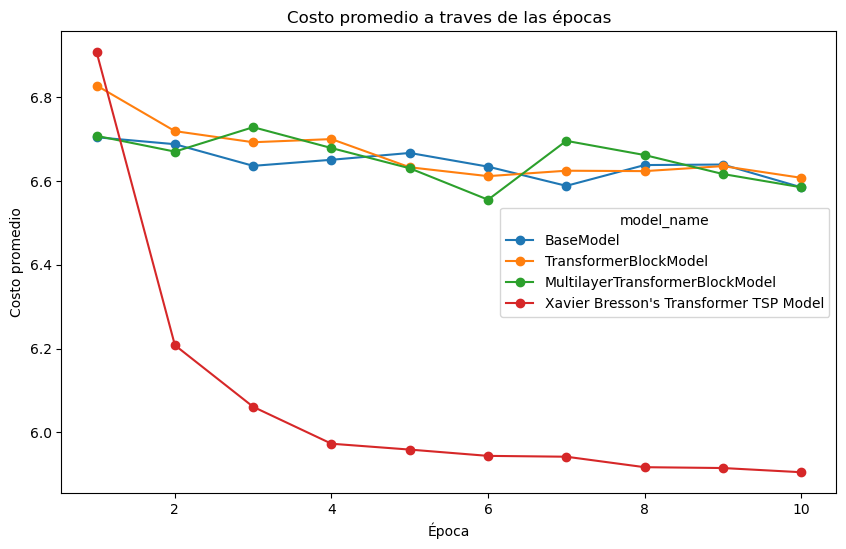

In [38]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(10, 6))
for name, color in zip(models_df['model_name'].unique(), colors):
        model_data=grouped_by_epoch_cost[grouped_by_epoch_cost['model_name'] == name]
        ax.plot(
            model_data['epoch'],
            model_data['cost'],
            color = color,
            marker='o',
            label=name,
        )
ax.plot(df_xb['epoch'], df_xb[' L_test'], color=colors[-1], label="Xavier Bresson's Transformer TSP Model", marker='o')
ax.set_title("Costo promedio a traves de las épocas")
ax.set_xlabel("Época")
ax.set_ylabel("Costo promedio")
ax.legend(title="model_name")
plt.show()
        

In [28]:
models_df = models_df[models_df["model_name"] != "MultilayerTransformerBlockModel"]

In [23]:

models_df

,model_name,iter,epoch,cost,Epoch,ModelName,Unnamed: 0,Model Name,cities
0,BaseModel,1.0,0.0,6.516486,NaN,NaN,NaN,NaN,NaN
1,BaseModel,1.0,0.0,6.876385,NaN,NaN,NaN,NaN,NaN
2,BaseModel,1.0,0.0,5.985434,NaN,NaN,NaN,NaN,NaN
3,BaseModel,1.0,0.0,6.970155,NaN,NaN,NaN,NaN,NaN
4,BaseModel,1.0,0.0,6.909487,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5,NaN,NaN,5.0,6.555117,5.0,MultilayerTransformerBlockModel,0.0,NaN,50.0
6,NaN,NaN,6.0,6.695555,6.0,MultilayerTransformerBlockModel,0.0,NaN,50.0
7,NaN,NaN,7.0,6.661708,7.0,MultilayerTransformerBlockModel,0.0,NaN,50.0
8,NaN,NaN,8.0,6.616426,8.0,MultilayerTransformerBlockModel,0.0,NaN,50.0
